In [152]:
Gn = 100 #mg/dl normal: 60 a 120. Cantidad de miligramos de glucosa por cada 100ml de sangre
Is = 5 #uU/ml micro unidades por mililitro, en ayunas (rango 5-20)
koi = 0.005 #tasa de excreción orina de la insulina
kog = 0.0001 #tasa de excreción orina de la glucosa
kp = 0.1 #tasa de secreción del pancreas
kh = 0.1 #tasa de aporte del hígado por catabolismo del glucógeno
kt = 0.0005 #tasa de transporte a los tejidos
qg = 0.1 #tasa de ingesta de glucoa
qi = 0.1 #tasa de aporte externo de la insulina
dt = 1 #minuto, debe simulares 1 dia
Gins = [] #Vector de ingesta de glucosa
Iins = [] #Vector de suplemento de insulina
mins = [] #Vector de tiempos

La cantidad de glucosa ingerida en mg. Onda sierra / tren de impulsos a la hora de las comidas. Con un decaimiento es el más real.

![image.png](imgs/image.png)

In [153]:
hora_desayuno = 6
duracion_desayuno = 30
hora_almuerzo = 12
duracion_almuerzo = 50
hora_merienda = 17
duracion_merienda = 30
hora_cena = 21
duracion_cena = 50

mins = [i for i in range(60*24+1)]
Gins = [0 for i in mins]
Iins = [0 for i in mins]
Gins[hora_desayuno*60:hora_desayuno*60+duracion_desayuno] = [40] * duracion_desayuno
Gins[hora_almuerzo*60:hora_almuerzo*60+duracion_almuerzo] = [10] * duracion_almuerzo
Gins[hora_merienda*60:hora_merienda*60+duracion_merienda] = [30] * duracion_merienda
Gins[hora_cena*60:hora_cena*60+duracion_cena] = [5] * duracion_cena



In [154]:
import matplotlib.pyplot as plt

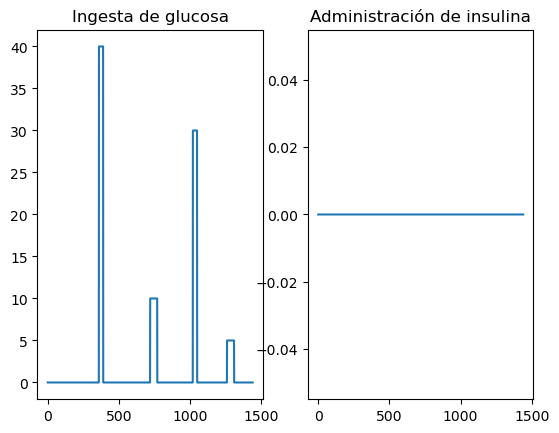

In [155]:
plt.subplot(1, 2, 1)
plt.title("Ingesta de glucosa")
plt.plot(mins, Gins)

plt.subplot(1, 2, 2)
plt.title("Administración de insulina")
plt.plot(mins, Iins)

plt.show()


In [156]:
#Constantes: kp, Gn, koi, qi
def dIs_dt_glucosa_alta(Gs, Gin, Is, Iin):
	return kp*(Gs-Gn) - koi*Is + qi * Iin

#Constantes: qg, kt, kog
def dGs_dt_glucosa_alta(Gs, Gin, Is, Iin):
	return qg * Gin - kt * Is * Gs - kog * Gs

In [157]:
#Constantes: koi, qi
def dIs_dt_glucosa_baja(Gs, Gin, Is, Iin):
	return -1 * koi * Is + qi * Iin

#Constantes: qg, kt, kh, Gn
def dGs_dt_glucosa_baja(Gs, Gin, Is, Iin):
	return qg * Gin - kt * Is * Gs + kh * (Gn - Gs)

In [158]:
def euler(mins, Gins, Iins, Gs0, Is0):
  Gss = [Gn]
  Iss = [Is0]
  for minuto, Gin, Iin in zip(mins, Gins, Iins):
    Gs = Gss[-1]
    Is = Iss[-1]
    if (minuto != 0):
      if Gs > Gn:
        Gss.append(Gs + dGs_dt_glucosa_alta(Gs, Gin, Is, Iin))
        Iss.append(Is + dIs_dt_glucosa_alta(Gs, Gin, Is, Iin))
      else:
        Gss.append(Gs + dGs_dt_glucosa_baja(Gs, Gin, Is, Iin))
        Iss.append(Is + dIs_dt_glucosa_baja(Gs, Gin, Is, Iin))

  return Gss, Iss

## Paciente sano

In [159]:
Gn = 100
Is = 5
Gss, Iss = euler(mins, Gins, Iins, Gn, Is)

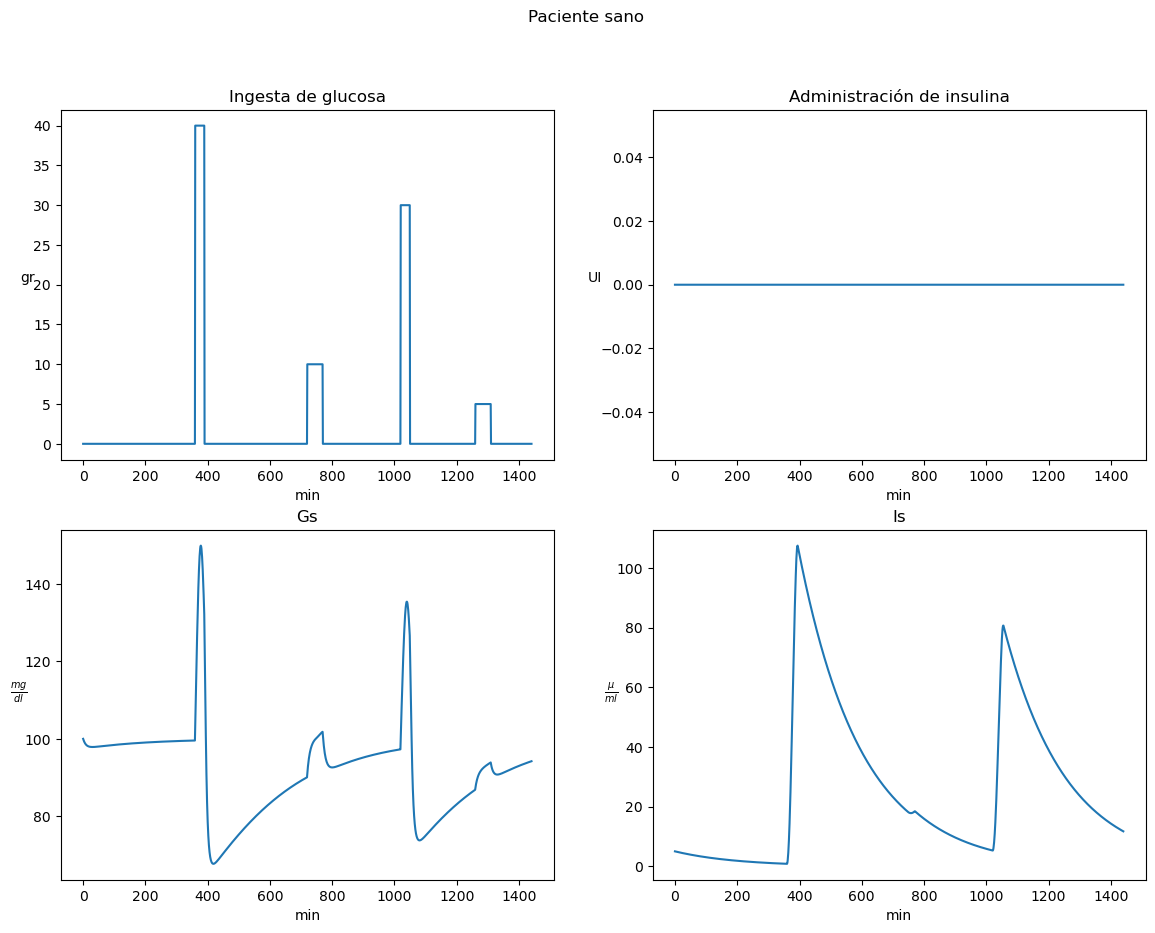

In [160]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.title("Ingesta de glucosa")
plt.ylabel("gr", rotation=0)
plt.xlabel("min")
plt.plot(mins, Gins)

plt.subplot(2, 2, 2)
plt.title("Administración de insulina")
plt.ylabel("UI", rotation=0)
plt.xlabel("min")
plt.plot(mins, Iins)


plt.subplot(2, 2, 3)
plt.title("Gs")
plt.ylabel(r"$\frac{mg}{dl}$", rotation=0)
plt.xlabel("min")
plt.plot(mins, Gss)

plt.subplot(2, 2, 4)
plt.title("Is")
plt.ylabel(r"$\frac{\mu}{ml}$", rotation=0)
plt.xlabel("min")
plt.plot(mins, Iss)

plt.suptitle("Paciente sano")
plt.show()

## Diabetes Tipo 1

In [161]:
Iins = [0 for i in mins]
Iins[hora_desayuno*60+int(duracion_desayuno/2)] = 1
Iins[hora_almuerzo*60+int(duracion_almuerzo/2)] = 15
Iins[hora_merienda*60+int(duracion_merienda/2)] = 1
Iins[hora_cena*60+int(duracion_cena/2)] = 5

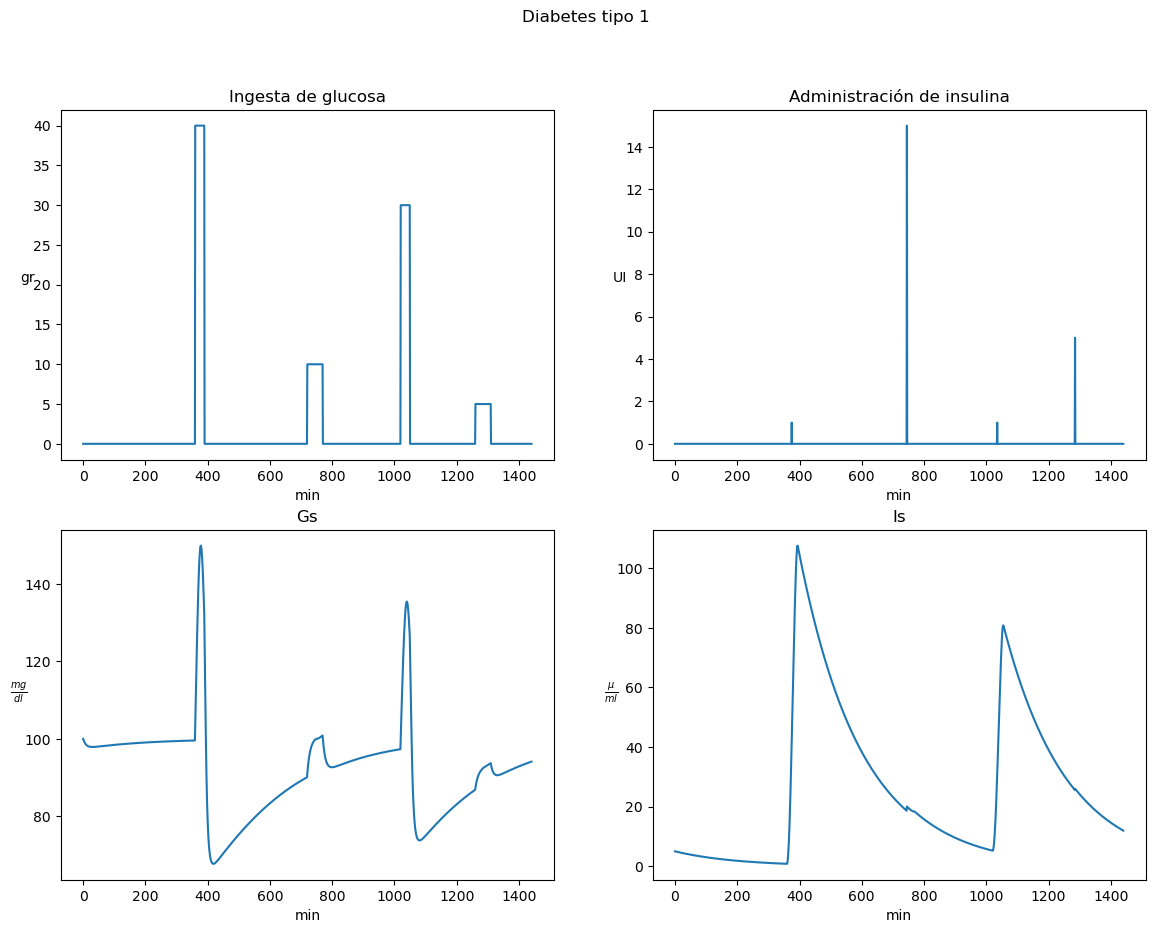

In [162]:
Gss, Iss = euler(mins, Gins, Iins, Gn, Is)
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.title("Ingesta de glucosa")
plt.ylabel("gr", rotation=0)
plt.xlabel("min")
plt.plot(mins, Gins)

plt.subplot(2, 2, 2)
plt.title("Administración de insulina")
plt.ylabel("UI", rotation=0)
plt.xlabel("min")
plt.plot(mins, Iins)


plt.subplot(2, 2, 3)
plt.title("Gs")
plt.ylabel(r"$\frac{mg}{dl}$", rotation=0)
plt.xlabel("min")
plt.plot(mins, Gss)

plt.subplot(2, 2, 4)
plt.title("Is")
plt.ylabel(r"$\frac{\mu}{ml}$", rotation=0)
plt.xlabel("min")
plt.plot(mins, Iss)

plt.suptitle("Diabetes tipo 1")
plt.show()

## Diabetes Tipo 2

In [163]:
kt = 0
Iins = [0 for i in mins]

In [164]:
Gss, Iss = euler(mins, Gins, Iins, Gn, Is)

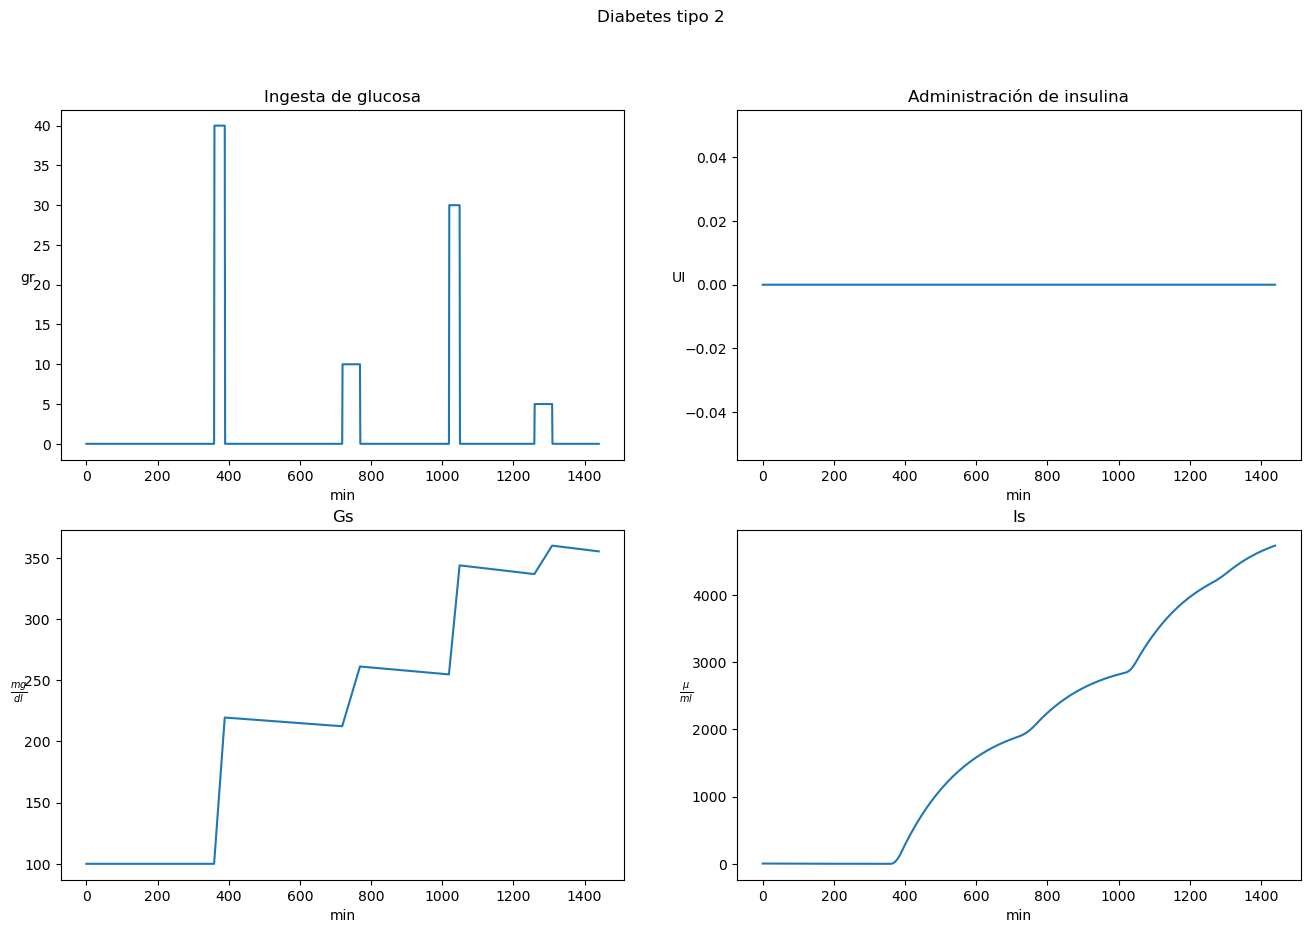

In [165]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plt.title("Ingesta de glucosa")
plt.ylabel("gr", rotation=0)
plt.xlabel("min")
plt.plot(mins, Gins)

plt.subplot(2, 2, 2)
plt.title("Administración de insulina")
plt.ylabel("UI", rotation=0)
plt.xlabel("min")
plt.plot(mins, Iins)


plt.subplot(2, 2, 3)
plt.title("Gs")
plt.ylabel(r"$\frac{mg}{dl}$", rotation=0)
plt.xlabel("min")
plt.plot(mins, Gss)

plt.subplot(2, 2, 4)
plt.title("Is")
plt.ylabel(r"$\frac{\mu}{ml}$", rotation=0)
plt.xlabel("min")
plt.plot(mins, Iss)

plt.suptitle("Diabetes tipo 2")
plt.show()